In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import PIL
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:

#Connecting to gdrive and mounting it
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [4]:
#Checking count of images in test and train dataset
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [6]:
#Creating the dataset below
##Defining few parameters as per the problem statement ask
batch_size = 32
img_height = 180
img_width = 180

In [7]:
##Writing the train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
            data_dir_train,
            batch_size=batch_size,
            image_size=(img_height, img_width),
            seed=123,
            validation_split=0.2,
            subset='training',
            )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
##Writing the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
            data_dir_train,
            batch_size=batch_size,
            image_size=(img_height, img_width),
            seed=123,
            validation_split=0.2,
            subset='validation',
            )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
##Listing out class names of skin cancer types and storing them in a list
class_names = train_ds.class_names
print(class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


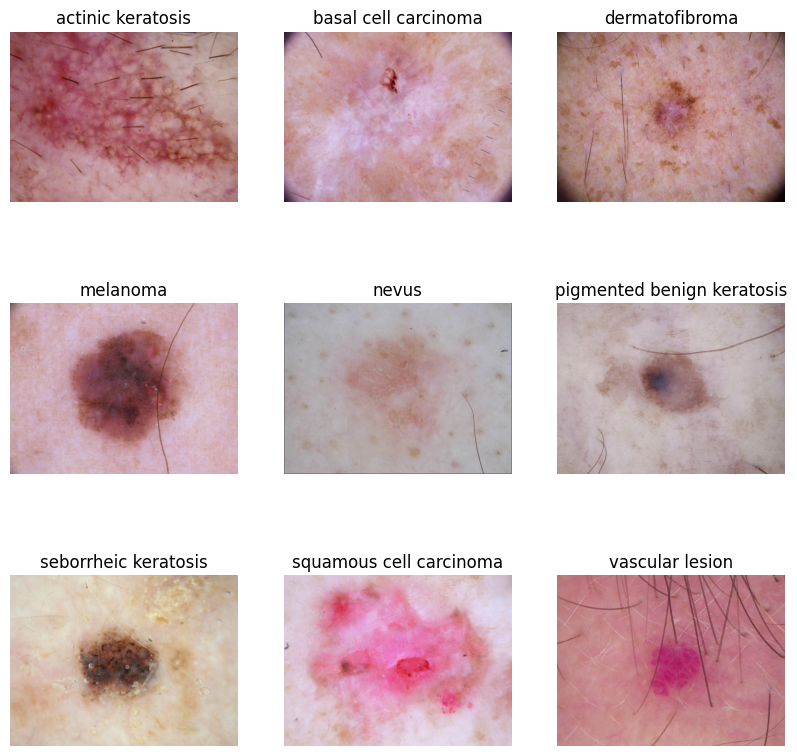

In [10]:
#Visualizing the data
##Creating a code snippet which helps in visualizing one instance of all the nine classes present in the dataset
##Getting one image from each folder
import glob
import matplotlib.image as mpimg

file_path = []
class_name = []

#get one file path from each folder
for dir_name in class_names:
  path = str(data_dir_train) +"/"+ dir_name
  for file_name in glob.iglob(path+'/*.jpg', recursive=True):
    #print(file_name)
    file_path.append(file_name)
    class_name.append(dir_name)
    break


#display one image from each folder
plt.figure(figsize=(10,10))
for i in range(len(class_name)):
  ax = plt.subplot(3,3,i+1)
  img = mpimg.imread(file_path[i])
  plt.imshow(img)
  plt.axis("off")
  plt.title(class_name[i])

In [11]:
#Confiuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
#Creating the model
num_class = 9
model = tf.keras.Sequential([
    layers.Rescaling(scale = 1./255, input_shape = (180,180,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_class)
])

In [13]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [14]:
#Viewing the summary of the all the layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [15]:
#Train the model : Running the model on train and validation set
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 647s 2s/step - loss: 2.0145 - accuracy: 0.2528 - val_loss: 1.8576 - val_accuracy: 0.3199
Epoch 2/20
56/56 [==============================] - 1s 22ms/step - loss: 1.7110 - accuracy: 0.4007 - val_loss: 1.5761 - val_accuracy: 0.4407
Epoch 3/20
56/56 [==============================] - 1s 23ms/step - loss: 1.4968 - accuracy: 0.4749 - val_loss: 1.4146 - val_accuracy: 0.5257
Epoch 4/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3647 - accuracy: 0.5279 - val_loss: 1.5691 - val_accuracy: 0.4497
Epoch 5/20
56/56 [==============================] - 1s 20ms/step - loss: 1.2611 - accuracy: 0.5469 - val_loss: 1.3738 - val_accuracy: 0.5548
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 1.1795 - accuracy: 0.5876 - val_loss: 1.3116 - val_accuracy: 0.5347
Epoch 7/20
56/56 [==============================] - 1s 20ms/step - loss: 1.1067 - accuracy: 0.6094 - val_loss: 1.4332 - val_accuracy: 0.5213
Epoch 8/20
56

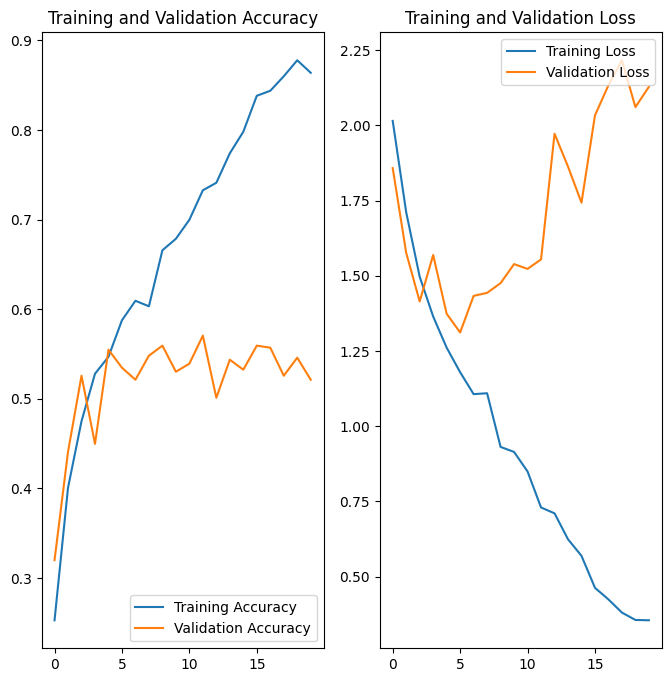

In [16]:
#Visualizing training details
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings :

The above model is clearly the case of overfitting and the model doesn't seem to be learning anything from the dataset.
   1. Training accuracy is very high, while validation accuracy is around 50%.
   2. The loss on the training set decreases after each epoch, but in the case of the validation set, it climbs back again after the 5th epoch.

In [17]:
#Executing data augmentation
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(height_factor=(0.2,0.3), width_factor=(0.2,0.3))
])

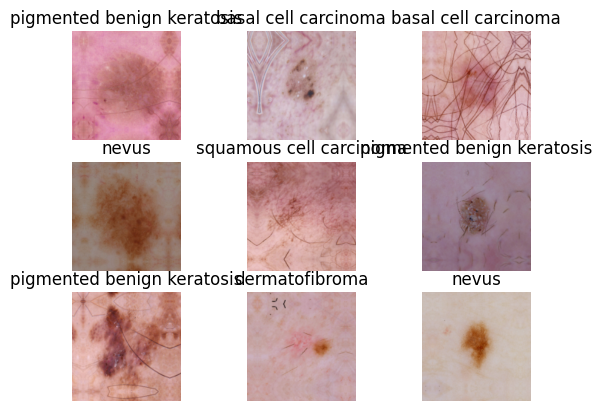

In [18]:
#Visualizing how the augmentation strategy works for one instance of training image
for img, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(data_augmentation(img)[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [19]:
#Creating model with an Dropout layer as we know our model is overfitting
num_classes = 9
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

In [20]:
#Compiling model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [21]:
#Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 33ms/step - loss: 2.0725 - accuracy: 0.1858 - val_loss: 2.0239 - val_accuracy: 0.1991
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 1.9726 - accuracy: 0.2349 - val_loss: 1.9014 - val_accuracy: 0.2953
Epoch 3/20
56/56 [==============================] - 2s 29ms/step - loss: 1.7607 - accuracy: 0.3538 - val_loss: 1.5713 - val_accuracy: 0.4497
Epoch 4/20
56/56 [==============================] - 2s 31ms/step - loss: 1.5820 - accuracy: 0.4308 - val_loss: 1.5028 - val_accuracy: 0.4810
Epoch 5/20
56/56 [==============================] - 2s 32ms/step - loss: 1.4753 - accuracy: 0.4894 - val_loss: 1.4290 - val_accuracy: 0.5190
Epoch 6/20
56/56 [==============================] - 2s 30ms/step - loss: 1.3827 - accuracy: 0.5022 - val_loss: 1.4600 - val_accuracy: 0.4922
Epoch 7/20
56/56 [==============================] - 2s 29ms/step - loss: 1.3694 - accuracy: 0.5117 - val_loss: 1.4584 - val_accuracy: 0.4989
Epoch 8/20
56

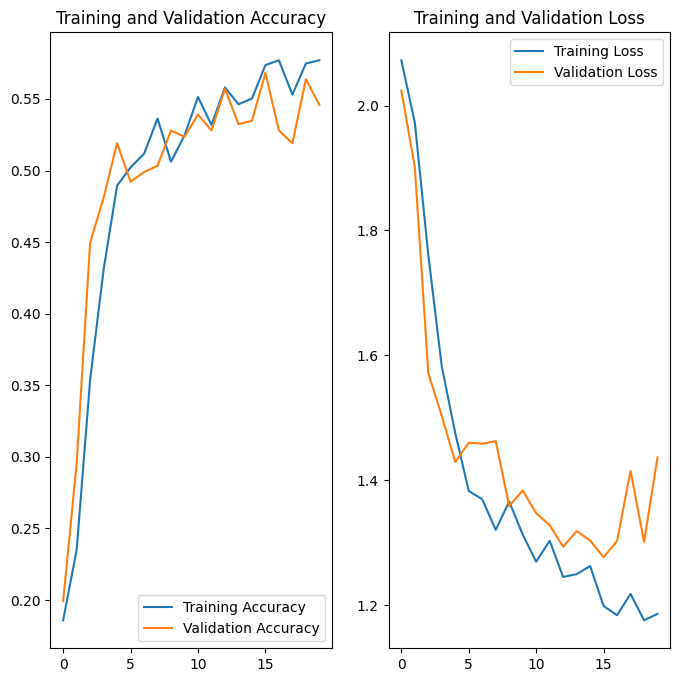

In [22]:
#Visualizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings --

In the above model use of data augmentation and dropout layer has reduced the problem of overfitting.

The accuracy of the model has greatly increased along with the synchronization of the verification accuracy. The loss function is synchronously exhausted for the training and validation data

In [23]:
#Checking Class Imbalance
##Creating path list and lesion list to get the path of the images and list of cancer lesions for label it into one among nine classes of skin cancer type
path_list=[]
lesion_list=[]

for i in class_names:
  for j in data_dir_train.glob(i+'/*.jpg'):
    path_list.append(str(j))
    lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
1,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
2,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
3,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
4,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2235,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2236,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2237,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion


<BarContainer object of 9 artists>

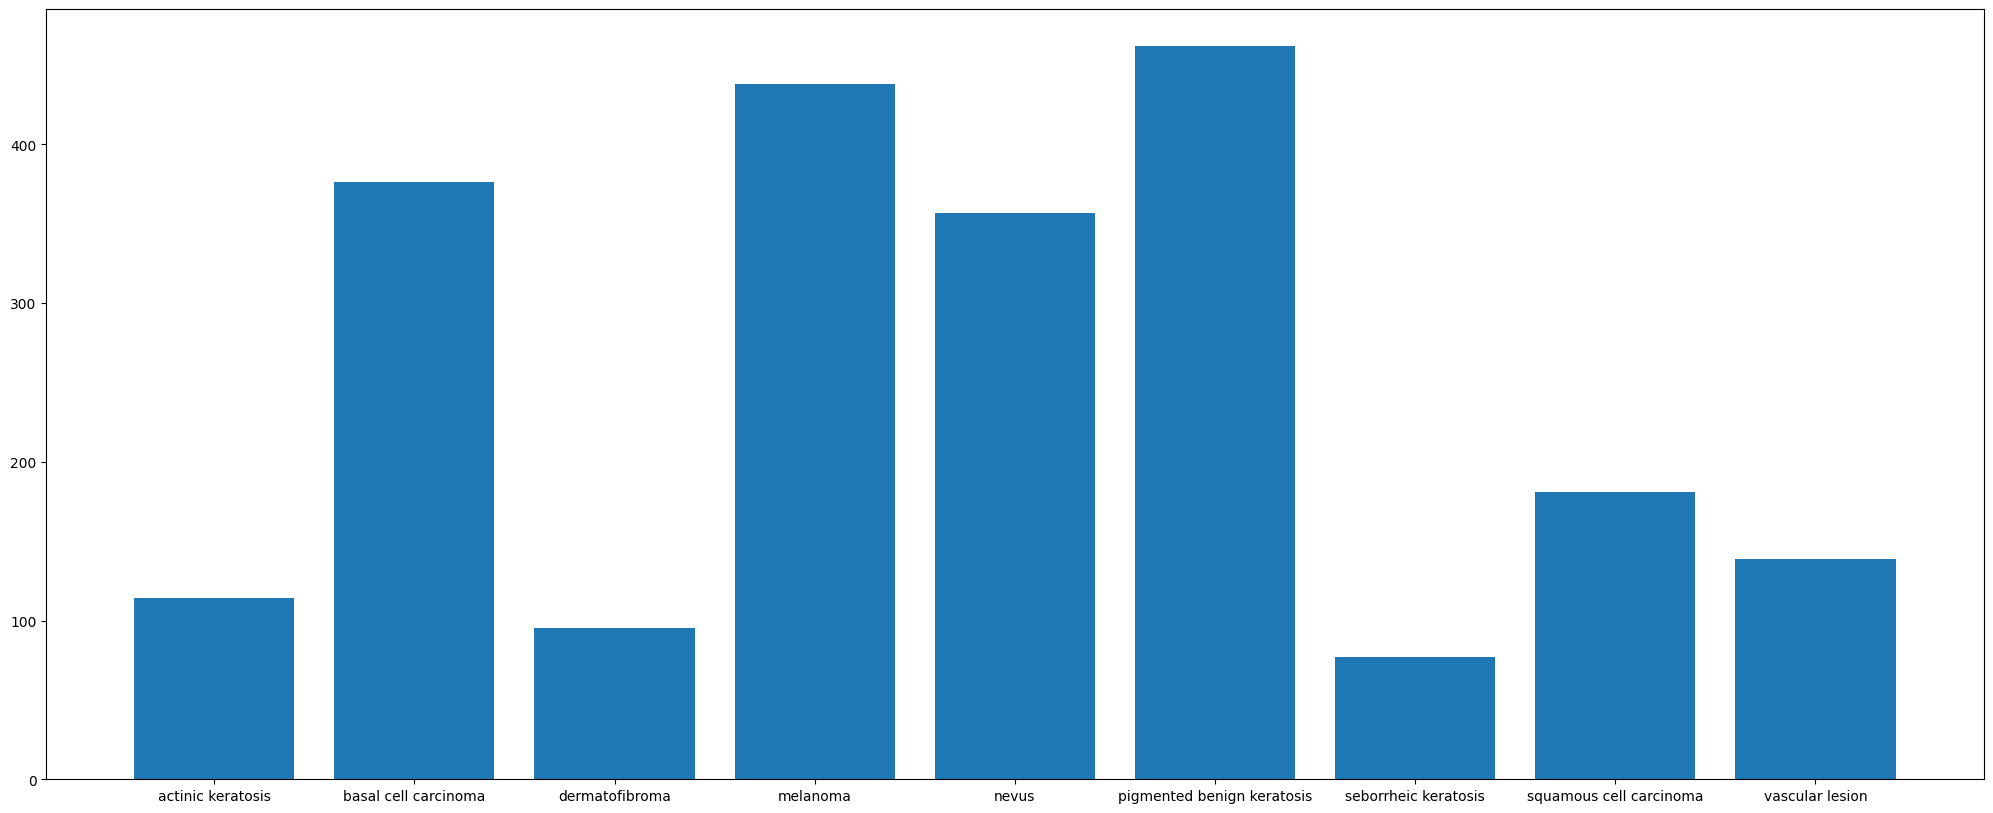

In [24]:
#Plotting the classes to check which classes are least and which classes dominate
class_count=[]
for i in class_names:
    class_count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,class_count)

Findings --

- Which class has the least number of samples?
  
  The least number of samples are in seborrheic keratosis

- Which classes dominate the data in terms proportionate number of samples?

  The classes dominate in the data are:-
  - Pigmented benign
  - Melanoma
  - Basal cell carcinoma
  - Nevus

In [25]:
#Handling the class imbalance
#Installing Augmentor
!pip install Augmentor

In [26]:
path_to_training_dataset="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability = 0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E4E88241960>: 100%|██████████| 500/500 [00:21<00:00, 22.94 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E4E700CF040>: 100%|██████████| 500/500 [00:22<00:00, 22.26 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E4E8BACAAA0>: 100%|██████████| 500/500 [00:23<00:00, 21.19 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7E4E92173670>: 100%|██████████| 500/500 [01:23<00:00,  5.97 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7E4E8B9CC730>: 100%|██████████| 500/500 [01:24<00:00,  5.93 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E4E883D5750>: 100%|██████████| 500/500 [00:19<00:00, 26.20 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E4E8BAC8190>: 100%|██████████| 500/500 [00:38<00:00, 12.96 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E4E8BC2F7C0>: 100%|██████████| 500/500 [00:18<00:00, 26.87 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E4E3B90A320>: 100%|██████████| 500/500 [00:17<00:00, 28.73 Samples/s]


In [27]:
#Checking total count of Augmented images
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [28]:
#Training the model on the data created using Augmentor
batch_size = 32
img_height = 180
img_width = 180

In [29]:
#Creating training dataset after augmentation
train_ds_new  = tf.keras.preprocessing.image_dataset_from_directory(
                                  data_dir_train,
                                  seed=123,
                                  validation_split = 0.2,
                                  subset = 'training',
                                  image_size=(img_height, img_width),
                                  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [30]:
#Creating validation dataset after augmentation
val_ds_new  = tf.keras.preprocessing.image_dataset_from_directory(
                                  data_dir_train,
                                  seed=123,
                                  validation_split = 0.2,
                                  subset = 'validation',
                                  image_size=(img_height, img_width),
                                  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [30]:
#Autotune and Cache for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:
#Creating the model and including batch normalization
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [32]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
#Training the model
epochs = 30
history = model.fit(
  train_ds_new,
  validation_data=val_ds_new ,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 39s 200ms/step - loss: 2.2113 - accuracy: 0.3984 - val_loss: 2.3413 - val_accuracy: 0.1225
Epoch 2/30
169/169 [==============================] - 40s 230ms/step - loss: 1.3388 - accuracy: 0.5054 - val_loss: 2.0316 - val_accuracy: 0.2101
Epoch 3/30
169/169 [==============================] - 39s 224ms/step - loss: 1.0882 - accuracy: 0.5994 - val_loss: 1.5670 - val_accuracy: 0.4336
Epoch 4/30
169/169 [==============================] - 34s 195ms/step - loss: 0.9309 - accuracy: 0.6730 - val_loss: 1.1673 - val_accuracy: 0.5939
Epoch 5/30
169/169 [==============================] - 36s 205ms/step - loss: 0.7675 - accuracy: 0.7198 - val_loss: 1.0425 - val_accuracy: 0.6377
Epoch 6/30
169/169 [==============================] - 34s 196ms/step - loss: 0.6384 - accuracy: 0.7786 - val_loss: 1.1447 - val_accuracy: 0.6236
Epoch 7/30
169/169 [==============================] - 36s 205ms/step - loss: 0.5686 - accuracy: 0.7982 - val_loss: 1.0700 - val_ac

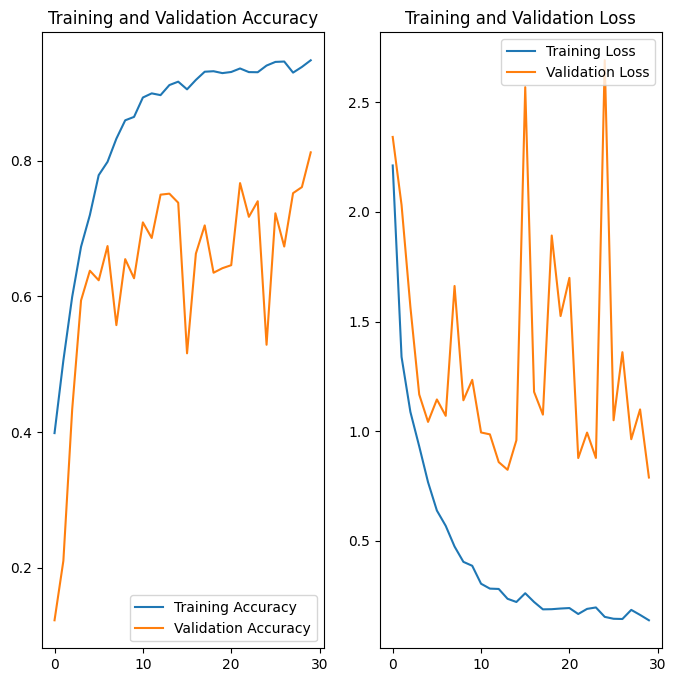

In [34]:
#Checking the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



Train accuracy - 94.7%

Validation accuracy - 81.2%

In [35]:
#Analyzing the test data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.


In [36]:
loss , accuracy = model.evaluate(test_ds)

4/4 [==============================] - 39s 74ms/step - loss: 5.2277 - accuracy: 0.3814


In [37]:
print("Accuracy on test data ", accuracy)

Accuracy on test data  0.3813559412956238


In [38]:
#Predicting on the test data
melanoma_path = "/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test/melanoma/ISIC_0000002.jpg"

img = tf.keras.utils.load_img(
    melanoma_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(score)

1/1 [==============================] - 0s 239ms/step
tf.Tensor(
[3.1562115e-07 3.0279709e-12 9.9548799e-01 8.3734369e-04 6.1790354e-04
 3.0559199e-03 2.3566797e-12 5.0949677e-07 5.9736617e-21], shape=(9,), dtype=float32)


In [39]:
print(
    "This image mostly belongs to {} with a {:.2f} percent confidence."
    .format(test_ds.class_names[np.argmax(score)], 100 * np.max(score))
)

This image mostly belongs to dermatofibroma with a 99.55 percent confidence.
